# Import the Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electric-vehicle-charging-in-germany/charging_data.csv


In [2]:
data = pd.read_csv('/kaggle/input/electric-vehicle-charging-in-germany/charging_data.csv')

# EDA

In [3]:
data.head(10)

,Unnamed: 0,betreiber,art_der_ladeeinrichung,anzahl_ladepunkte,anschlussleistung,steckertypen1,steckertypen2,steckertypen3,steckertypen4,p1_kw,...,p4_kw,kreis_kreisfreie_stadt,ort,postleitzahl,strasse,hausnummer,adresszusatz,inbetriebnahmedatum,breitengrad,laengengrad
0,0,GGEW AG,Normalladeeinrichtung,1,4.6,AC Steckdose Typ 2,NaN,NaN,NaN,4.6,...,NaN,Landkreis Bergstraße,Lorsch,64653,Klosterstr.,23,NaN,2017-01-02,49.653064,8.572109
1,1,Pfalzwerke AG,Schnellladeeinrichtung,2,75.0,AC Steckdose Typ 2,DC Kupplung Combo,NaN,NaN,22.0,...,NaN,Landkreis Bergstraße,Lorsch,64653,Nibelungenstraße,135-137,NaN,2021-04-27,49.652969,8.554764
2,2,ENTEGA Energie GmbH,Normalladeeinrichtung,2,44.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,...,NaN,Landkreis Bergstraße,Fürth,64658,Krumbacher Str.,39,NaN,2017-11-21,49.658037,8.787881
3,3,Entega Plus GmbH,Normalladeeinrichtung,2,22.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,...,NaN,Landkreis Bergstraße,Fürth,64658,Erbacher Str.,102,a,2022-04-08,49.663670,8.796830
4,4,Entega Plus GmbH,Normalladeeinrichtung,2,22.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,...,NaN,Landkreis Bergstraße,Fürth,64658,Schulstr.,12,NaN,2022-04-08,49.646360,8.781410
5,5,Vogel Autohäuser GmbH & Co. KG,Normalladeeinrichtung,2,44.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,...,NaN,Landkreis Bergstraße,Zwingenberg,64673,Gießer Weg,16,NaN,2019-11-24,49.722681,8.602622
6,6,Entega Plus GmbH,Schnellladeeinrichtung,2,150.0,DC Kupplung Combo,DC Kupplung Combo,NaN,NaN,150.0,...,NaN,Landkreis Bergstraße,Einhausen,64683,In der Wolfshecke,1,NaN,2022-07-20,49.663796,8.543574
7,7,Entega Plus GmbH,Normalladeeinrichtung,2,22.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,...,NaN,Landkreis Bergstraße,Einhausen,64683,Friedensstr.,3,NaN,2022-09-15,49.671588,8.548023
8,8,ALDI SÜD,Normalladeeinrichtung,2,44.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,...,NaN,Landkreis Bergstraße,Lautertal,64686,Nibelungenstraße,349-351,NaN,2021-02-16,49.711272,8.703318
9,9,ENTEGA Energie GmbH,Normalladeeinrichtung,2,44.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,...,NaN,Landkreis Bergstraße,Grasellenbach,64689,Am Kurpark,1,NaN,2017-07-31,49.627596,8.858623


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36770 entries, 0 to 36769
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              36770 non-null  int64  
 1   betreiber               36770 non-null  object 
 2   art_der_ladeeinrichung  36770 non-null  object 
 3   anzahl_ladepunkte       36770 non-null  int64  
 4   anschlussleistung       36770 non-null  float64
 5   steckertypen1           36770 non-null  object 
 6   steckertypen2           31111 non-null  object 
 7   steckertypen3           2233 non-null   object 
 8   steckertypen4           1132 non-null   object 
 9   p1_kw                   36770 non-null  float64
 10  p2_kw                   31129 non-null  float64
 11  p3_kw                   2233 non-null   float64
 12  p4_kw                   1131 non-null   float64
 13  kreis_kreisfreie_stadt  36770 non-null  object 
 14  ort                     36770 non-null

In [5]:
data.drop('Unnamed: 0',axis = 1,inplace = True)

In [6]:
data

,betreiber,art_der_ladeeinrichung,anzahl_ladepunkte,anschlussleistung,steckertypen1,steckertypen2,steckertypen3,steckertypen4,p1_kw,p2_kw,...,p4_kw,kreis_kreisfreie_stadt,ort,postleitzahl,strasse,hausnummer,adresszusatz,inbetriebnahmedatum,breitengrad,laengengrad
0,GGEW AG,Normalladeeinrichtung,1,4.6,AC Steckdose Typ 2,NaN,NaN,NaN,4.6,NaN,...,NaN,Landkreis Bergstraße,Lorsch,64653,Klosterstr.,23,NaN,2017-01-02,49.653064,8.572109
1,Pfalzwerke AG,Schnellladeeinrichtung,2,75.0,AC Steckdose Typ 2,DC Kupplung Combo,NaN,NaN,22.0,50.0,...,NaN,Landkreis Bergstraße,Lorsch,64653,Nibelungenstraße,135-137,NaN,2021-04-27,49.652969,8.554764
2,ENTEGA Energie GmbH,Normalladeeinrichtung,2,44.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,22.0,...,NaN,Landkreis Bergstraße,Fürth,64658,Krumbacher Str.,39,NaN,2017-11-21,49.658037,8.787881
3,Entega Plus GmbH,Normalladeeinrichtung,2,22.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,22.0,...,NaN,Landkreis Bergstraße,Fürth,64658,Erbacher Str.,102,a,2022-04-08,49.663670,8.796830
4,Entega Plus GmbH,Normalladeeinrichtung,2,22.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,22.0,...,NaN,Landkreis Bergstraße,Fürth,64658,Schulstr.,12,NaN,2022-04-08,49.646360,8.781410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36765,Stadtwerke Leipzig GmbH,Normalladeeinrichtung,2,30.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,22.0,...,NaN,Kreisfreie Stadt Leipzig,Leipzig,4277,Bornaische Straße,108,NaN,2016-06-01,51.301227,12.384566
36766,Stadtwerke Leipzig GmbH,Normalladeeinrichtung,2,30.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,22.0,...,NaN,Kreisfreie Stadt Leipzig,Leipzig,4277,Scheffelstraße,35,NaN,2016-06-01,51.311695,12.372912
36767,Stadtwerke Leipzig GmbH,Normalladeeinrichtung,2,30.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,22.0,...,NaN,Kreisfreie Stadt Leipzig,Leipzig,4277,Bornaische Straße,55,NaN,2018-07-05,51.305046,12.382487
36768,Stadtwerke Leipzig GmbH,Normalladeeinrichtung,2,30.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,22.0,...,NaN,Kreisfreie Stadt Leipzig,Leipzig,4277,Richard Lehmann Straße,120,NaN,2019-08-12,51.314325,12.397213


In [7]:
from tabulate import tabulate

# Calculate the percentage of null values in each column
null_percentage = (data.isnull().sum() / len(data)) * 100

# Create a DataFrame to store the results
null_table = pd.DataFrame({'Column': null_percentage.index, 'Null Percentage': null_percentage.values})

# Print the table in a formatted manner
print(tabulate(null_table, headers='keys', tablefmt='psql'))

+----+------------------------+-------------------+
|    | Column                 |   Null Percentage |
|----+------------------------+-------------------|
|  0 | betreiber              |            0      |
|  1 | art_der_ladeeinrichung |            0      |
|  2 | anzahl_ladepunkte      |            0      |
|  3 | anschlussleistung      |            0      |
|  4 | steckertypen1          |            0      |
|  5 | steckertypen2          |           15.3903 |
|  6 | steckertypen3          |           93.9271 |
|  7 | steckertypen4          |           96.9214 |
|  8 | p1_kw                  |            0      |
|  9 | p2_kw                  |           15.3413 |
| 10 | p3_kw                  |           93.9271 |
| 11 | p4_kw                  |           96.9241 |
| 12 | kreis_kreisfreie_stadt |            0      |
| 13 | ort                    |            0      |
| 14 | postleitzahl           |            0      |
| 15 | strasse                |            0      |
| 16 | hausn

In [8]:
data.columns

Index(['betreiber', 'art_der_ladeeinrichung', 'anzahl_ladepunkte',
       'anschlussleistung', 'steckertypen1', 'steckertypen2', 'steckertypen3',
       'steckertypen4', 'p1_kw', 'p2_kw', 'p3_kw', 'p4_kw',
       'kreis_kreisfreie_stadt', 'ort', 'postleitzahl', 'strasse',
       'hausnummer', 'adresszusatz', 'inbetriebnahmedatum', 'breitengrad',
       'laengengrad'],
      dtype='object')

In [9]:
data = data.rename(columns={
    'betreiber': 'operator',
    'art_der_ladeeinrichung': 'charging_facility_type',
    'anzahl_ladepunkte': 'number_of_charging_points',
    'anschlussleistung': 'power_connection_capacity',
    'steckertypen1': 'plug_type_1',
    'steckertypen2': 'plug_type_2',
    'steckertypen3': 'plug_type_3',
    'steckertypen4': 'plug_type_4',
    'p1_kw': 'power_capacity_kw_1',
    'p2_kw': 'power_capacity_kw_2',
    'p3_kw': 'power_capacity_kw_3',
    'p4_kw': 'power_capacity_kw_4',
    'kreis_kreisfreie_stadt': 'district_city',
    'ort': 'city',
    'postleitzahl': 'postal_code',
    'strasse': 'street',
    'hausnummer': 'house_number',
    'adresszusatz': 'address_additional',
    'inbetriebnahmedatum': 'commissioning_date',
    'breitengrad': 'latitude',
    'laengengrad': 'longitude'
})

In [10]:
data.head()

,operator,charging_facility_type,number_of_charging_points,power_connection_capacity,plug_type_1,plug_type_2,plug_type_3,plug_type_4,power_capacity_kw_1,power_capacity_kw_2,...,power_capacity_kw_4,district_city,city,postal_code,street,house_number,address_additional,commissioning_date,latitude,longitude
0,GGEW AG,Normalladeeinrichtung,1,4.6,AC Steckdose Typ 2,NaN,NaN,NaN,4.6,NaN,...,NaN,Landkreis Bergstraße,Lorsch,64653,Klosterstr.,23,NaN,2017-01-02,49.653064,8.572109
1,Pfalzwerke AG,Schnellladeeinrichtung,2,75.0,AC Steckdose Typ 2,DC Kupplung Combo,NaN,NaN,22.0,50.0,...,NaN,Landkreis Bergstraße,Lorsch,64653,Nibelungenstraße,135-137,NaN,2021-04-27,49.652969,8.554764
2,ENTEGA Energie GmbH,Normalladeeinrichtung,2,44.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,22.0,...,NaN,Landkreis Bergstraße,Fürth,64658,Krumbacher Str.,39,NaN,2017-11-21,49.658037,8.787881
3,Entega Plus GmbH,Normalladeeinrichtung,2,22.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,22.0,...,NaN,Landkreis Bergstraße,Fürth,64658,Erbacher Str.,102,a,2022-04-08,49.663670,8.796830
4,Entega Plus GmbH,Normalladeeinrichtung,2,22.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,22.0,...,NaN,Landkreis Bergstraße,Fürth,64658,Schulstr.,12,NaN,2022-04-08,49.646360,8.781410


In [11]:
# Retain important columns
important_columns = ['operator', 'charging_facility_type', 'number_of_charging_points', 'power_connection_capacity',
                     'plug_type_1', 'power_capacity_kw_1', 'district_city', 'city', 'postal_code',
                     'street', 'house_number', 'commissioning_date', 'latitude', 'longitude']

# Create a new DataFrame with the important columns
data = data[important_columns].copy()

In [12]:
total_charging_points = data['number_of_charging_points'].sum()
total_charging_points

71263

In [13]:
total_power_capacity = data['power_connection_capacity'].sum()
total_power_capacity

1981145.2800000003

Based on the provided DataFrame, the total number of charging points in Germany is 71,263, and the total power connection capacity is approximately 1,981,145.28 kilowatts (kW). It suggests that there are a significant number of charging points to cater to the growing number of electric vehicles.

In [14]:
charging_points_summary = data["number_of_charging_points"].describe()
print(charging_points_summary)

count    36770.000000
mean         1.938075
std          0.550034
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: number_of_charging_points, dtype: float64


These statistics provide information about the distribution and central tendency of the number of charging points in the dataset. The mean value of approximately 1.94 suggests that, on average, there are less than 2 charging points per location. The minimum and maximum values indicate that some locations have only 1 charging point, while the maximum number of charging points at a single location is 4.

In [15]:
unique_operators = data['operator'].nunique()
print("Total unique operators:", unique_operators)

Total unique operators: 4772


In [16]:
total_charging_stations = len(data)
avg_charging_stations_per_operator = total_charging_stations / unique_operators
print("Average charging stations per operator:", avg_charging_stations_per_operator)

Average charging stations per operator: 7.70536462699078


In [17]:
city_charging_station_counts = data['city'].value_counts().nlargest(10)  # Change the number in nlargest() as desired
print("Cities with the highest number of charging stations:")
print(city_charging_station_counts)

Cities with the highest number of charging stations:
München                1403
Berlin                 1250
Hamburg                 938
Stuttgart               696
Hannover                474
Dortmund                451
Rüsselsheim am Main     411
Düsseldorf              401
Sindelfingen            329
Regensburg              310
Name: city, dtype: int64


In [18]:
# Count the number of charging stations by type
charging_station_types = data['charging_facility_type'].value_counts()

# Print the charging station types and their counts
print("Charging Station Types:")
print(charging_station_types)

Charging Station Types:
Normalladeeinrichtung     30891
Schnellladeeinrichtung     5879
Name: charging_facility_type, dtype: int64


In [19]:
avg_charging_points_by_operator = data.groupby("operator")["number_of_charging_points"].mean()
top_50_operators = avg_charging_points_by_operator.nlargest(50)
print(top_50_operators)

operator
ADAC Fahrsicherheitszentrum Berlin-Brandenburg GmbH                    4.0
AGON                                                                   4.0
AGRAVIS                                                                4.0
ANSMANN AG                                                             4.0
ATM Reparaturzentrum                                                   4.0
AWN - Abfallwirtschaftsgesellschaft des Neckar-Odenwald-Kreises mbH    4.0
Aliseo GmbH                                                            4.0
Alpenhotel Wittelsbach                                                 4.0
Altes Postamt Schlitz                                                  4.0
Ambulanter Pflegedienst Angelika Müller e.K.                           4.0
Andreas Schmid Logistik AG                                             4.0
Arbeitsschutz-Express GmbH                                             4.0
Auto Bebion GmbH                                                       4.0
Auto Gellermann 

In [20]:
city_operator_count = data.groupby("city")["operator"].nunique()
city_operator_count = city_operator_count.sort_values(ascending=False).nlargest(60)
print(city_operator_count)

city
Berlin               86
Hamburg              67
München              58
Stuttgart            43
Dresden              38
Düsseldorf           38
Köln                 36
Bremen               36
Leipzig              35
Chemnitz             33
Münster              30
Dortmund             29
Augsburg             27
Magdeburg            27
Essen                26
Paderborn            26
Kiel                 25
Bochum               25
Ingolstadt           24
Hannover             24
Frankfurt am Main    24
Nürnberg             24
Heilbronn            24
Aachen               23
Karlsruhe            23
Erfurt               22
Regensburg           22
Bielefeld            21
Frankfurt            21
Mannheim             21
Duisburg             21
Bocholt              19
Braunschweig         19
Rostock              18
Wolfsburg            18
Passau               18
Mönchengladbach      18
Wiesbaden            18
Gelsenkirchen        17
Koblenz              17
Osnabrück            17
Wuppertal  

Based on the provided information, the cities with the highest count of unique operators are:

* Berlin - 86 unique operators
* Hamburg - 67 unique operators
* München (Munich) - 58 unique operators
* Stuttgart - 43 unique operators
* Dresden - 38 unique operators
##### These cities have a higher number of unique operators, indicating a potentially higher demand for operators and a need for more charging infrastructure in these areas. Therefore, Berlin, Hamburg, München, Stuttgart, and Dresden are the cities that require more operators based on the count of unique operators operating in those cities.

In [21]:
avg_power_capacity_per_operator = data.groupby('operator')['power_connection_capacity'].mean()
top_50_operators = avg_power_capacity_per_operator.nlargest(50)
print(top_50_operators)

operator
Porsche Zentrum Kassel Glinicke Sportwagen GmbH                        630.000000
Brüder Ley GmbH                                                        600.000000
Software AG Stiftung ./. co Völk Hausverwaltung GmbH                   583.000000
Freisinger Bank eG                                                     452.000000
GPM                                                                    400.000000
Autohaus Hoch GmbH & Co. KG                                            386.500000
Autohaus Leicht GmbH                                                   364.800000
IONITY GmbH                                                            350.000000
Porsche Zentrum Aschaffenburg  HENRICI Sportwagen GmbH                 350.000000
Porsche Zentrum Bamberg                                                350.000000
Porsche Zentrum Berlin-Adlershof, Porsche Niederlassung Berlin GmbH    350.000000
Porsche Zentrum Dortmund                                               350.000000
Porsche

In [22]:
# Calculate correlation between number of charging points and power connection capacity
correlation = data['number_of_charging_points'].corr(data['power_connection_capacity'])
print("Correlation between number of charging points and power connection capacity:", correlation)

Correlation between number of charging points and power connection capacity: 0.17687501468973113


# Data Visualization

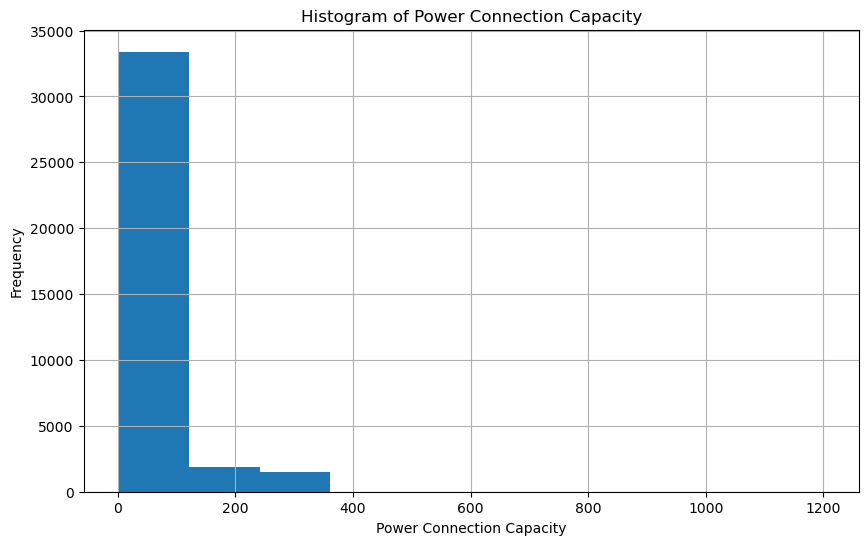

In [23]:
import matplotlib.pyplot as plt

# Plot histogram of power connection capacity
plt.figure(figsize=(10, 6))
data['power_connection_capacity'].hist(bins=10)
plt.xlabel("Power Connection Capacity")
plt.ylabel("Frequency")
plt.title("Histogram of Power Connection Capacity")
plt.show()


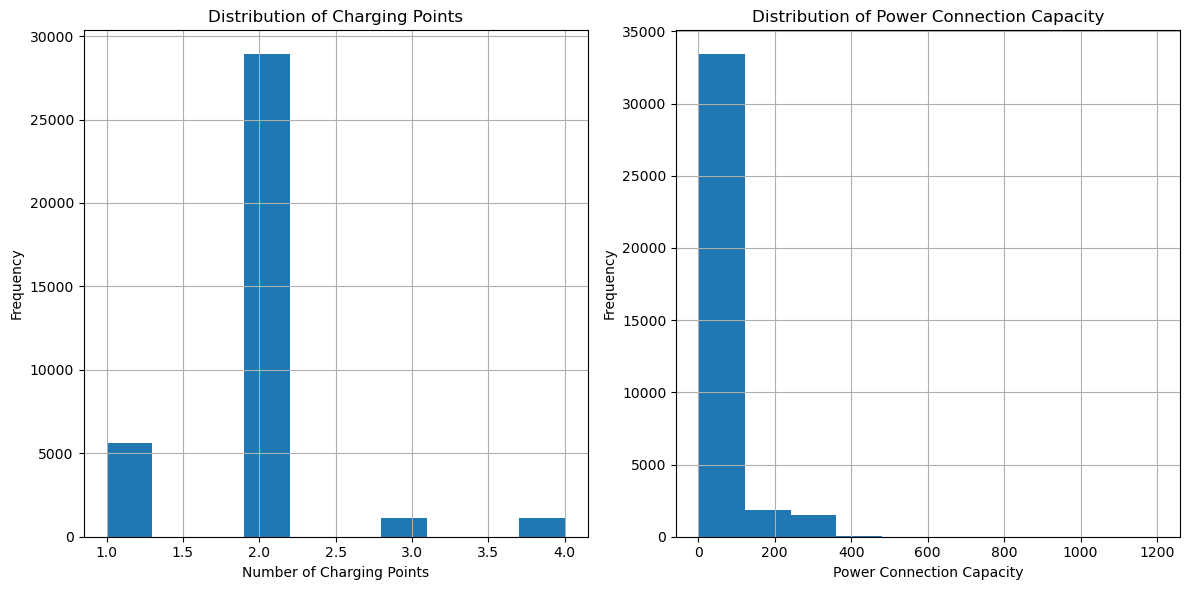

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

data['number_of_charging_points'].hist(ax=axes[0], bins=10)
axes[0].set_xlabel('Number of Charging Points')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Charging Points')

data['power_connection_capacity'].hist(ax=axes[1], bins=10)
axes[1].set_xlabel('Power Connection Capacity')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Power Connection Capacity')

plt.tight_layout()
plt.show()

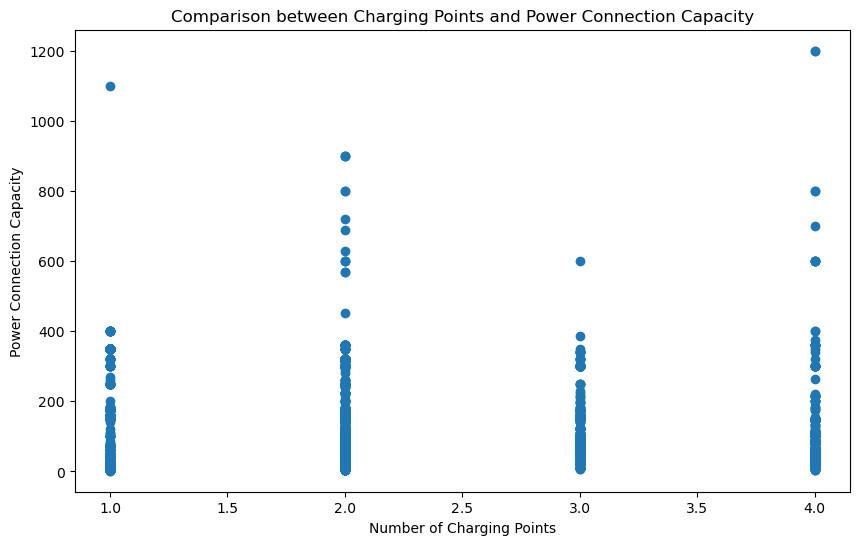

In [25]:
# Extract the relevant columns
charging_points = data["number_of_charging_points"]
power_capacity = data["power_connection_capacity"]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(charging_points, power_capacity)
plt.xlabel("Number of Charging Points")
plt.ylabel("Power Connection Capacity")
plt.title("Comparison between Charging Points and Power Connection Capacity")
plt.show()

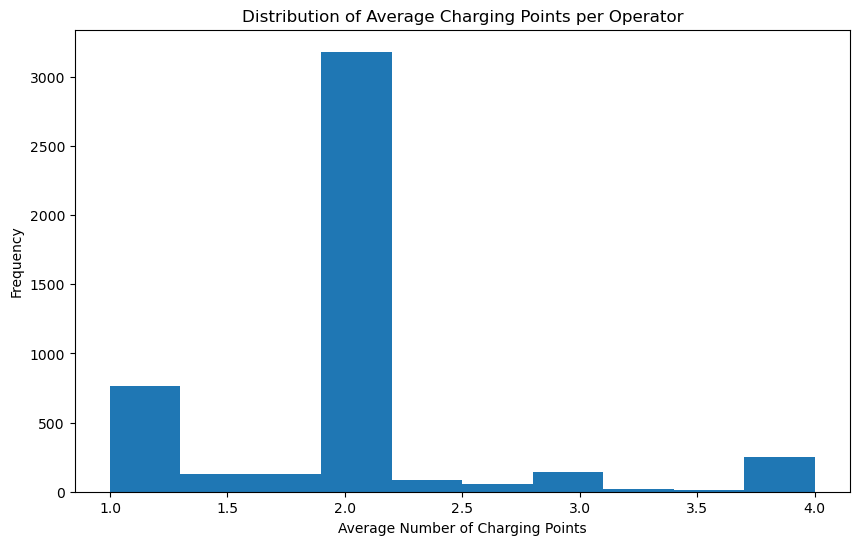

In [26]:
import matplotlib.pyplot as plt

# Plot the distribution of the average number of charging points
plt.figure(figsize=(10, 6))
avg_charging_points_by_operator.plot(kind="hist", bins=10)
plt.xlabel("Average Number of Charging Points")
plt.ylabel("Frequency")
plt.title("Distribution of Average Charging Points per Operator")
plt.show()


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36770 entries, 0 to 36769
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   operator                   36770 non-null  object 
 1   charging_facility_type     36770 non-null  object 
 2   number_of_charging_points  36770 non-null  int64  
 3   power_connection_capacity  36770 non-null  float64
 4   plug_type_1                36770 non-null  object 
 5   power_capacity_kw_1        36770 non-null  float64
 6   district_city              36770 non-null  object 
 7   city                       36770 non-null  object 
 8   postal_code                36770 non-null  int64  
 9   street                     36770 non-null  object 
 10  house_number               36770 non-null  object 
 11  commissioning_date         36770 non-null  object 
 12  latitude                   36770 non-null  float64
 13  longitude                  36770 non-null  flo

# GEO-SPATIAL ANALYSIS

/tmp/ipykernel_28/1433366960.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


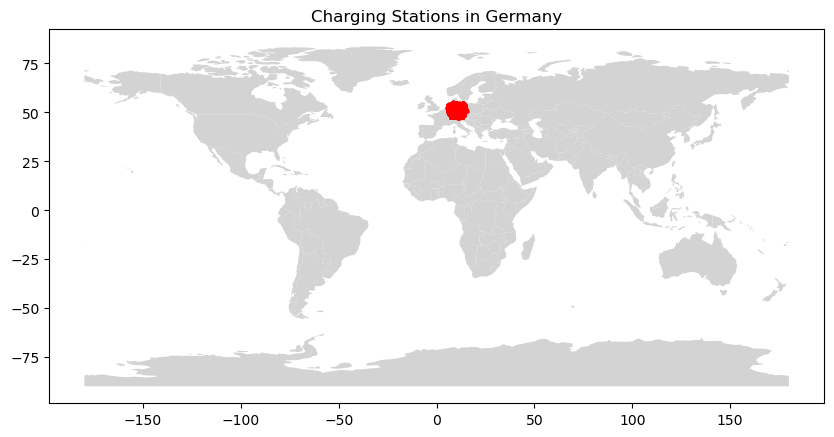

In [28]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Create a GeoDataFrame from the DataFrame using latitude and longitude columns
geometry = gpd.points_from_xy(data['longitude'], data['latitude'])
gdf = gpd.GeoDataFrame(data, geometry=geometry)

# Plot the charging stations on a map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(10, 10))
world.plot(ax=ax, color='lightgray')
gdf.plot(ax=ax, markersize=5, color='red')
plt.title('Charging Stations in Germany')
plt.show()

In [29]:
!pip install geopy

In [30]:
german_cities = data['city'].unique().tolist()
print(german_cities)

['Lorsch', 'Fürth', 'Zwingenberg', 'Einhausen', 'Lautertal', 'Grasellenbach', 'Viernheim', 'Lampertheim', 'Hüttenfeld', 'Bürstadt', 'Hirschhorn', 'Birkenau', 'Mörlenbach', 'Pfungstadt', 'Pfungstadt-Escholbrücken', 'Weiterstadt', 'Seeheim-Jugenheim', 'Griesheim', 'Reinheim', 'Mühltal', 'Ober-Ramstadt', 'Roßdorf', 'Erzhausen', 'Modautal', 'Gross-Bieberau', 'Groß-Bieberau', 'Bickenbach', 'Messel', 'Alsbach', 'Dieburg', 'Groß-Umstadt', 'Groß Umstadt', 'Babenhausen', 'Münster', 'Groß-Zimmern', 'Schaafheim', 'Mosbach', 'Otzberg-Lengfeld', 'Otzberg', 'Eppertshausen', 'Fulda', 'Hünfeld', 'Künzell', 'Petersberg', 'Hilders', 'Eichenzell', 'Gersfeld (Rhön)', 'Eiterfeld', 'Großenlüder', 'Kalbach', 'Uttrichshausen', 'Burghaun', 'Dipperz', 'Poppenhausen', 'Rasdorf', 'Laubach', 'Gießen', 'Giessen', 'Hungen', 'Pohlheim', 'Buseck', 'Lich', 'Langgöns', 'Linden', 'Reiskirchen', 'Heuchelheim', 'Groß-Gerau', 'Mörfelden-Walldorf', 'Riedstadt', 'Wolfskehlen (Riedstadt)', 'Büttelborn', 'Gernsheim', 'Stockstad

### Enter the German City from the list above

In [31]:
from geopy.geocoders import Nominatim

def get_city_coordinates(city_name):
    geolocator = Nominatim(user_agent='my-app')
    location = geolocator.geocode(city_name + ', Germany')

    if location is not None:
        latitude = location.latitude
        longitude = location.longitude
        return latitude, longitude
    else:
        return None

# Example usage
city_name = input("Enter the German city name: ")
coordinates = get_city_coordinates(city_name)

if coordinates is not None:
    latitude, longitude = coordinates
    print(f"Latitude: {latitude}")
    print(f"Longitude: {longitude}")
else:
    print("City not found.")


import geopandas as gpd
from shapely.geometry import Point

# Create a GeoDataFrame from the DataFrame using latitude and longitude columns
geometry = gpd.points_from_xy(data['longitude'], data['latitude'])
gdf = gpd.GeoDataFrame(data, geometry=geometry)

# Define the target location coordinates
target_longitude = longitude
target_latitude = latitude

# Create a Point for the target location
target_location = Point(target_longitude, target_latitude)

# Find the nearest charging station
nearest_station = gdf.geometry.distance(target_location).idxmin()
nearest_station_info = gdf.loc[nearest_station]

print("Nearest Charging Station:")
print(nearest_station_info)


Enter the German city name:  Nickenich


Latitude: 50.4124083
Longitude: 7.3269472
Nearest Charging Station:
operator                        Westenergie Metering GmbH
charging_facility_type              Normalladeeinrichtung
number_of_charging_points                               2
power_connection_capacity                            44.0
plug_type_1                            AC Steckdose Typ 2
power_capacity_kw_1                                  22.0
district_city                     Landkreis Mayen-Koblenz
city                                            Nickenich
postal_code                                         56645
street                                          Kirchstr.
house_number                                            2
commissioning_date                             2020-01-17
latitude                                        50.413378
longitude                                        7.325941
geometry                     POINT (7.3259406 50.4133775)
Name: 36379, dtype: object


# Trend over time

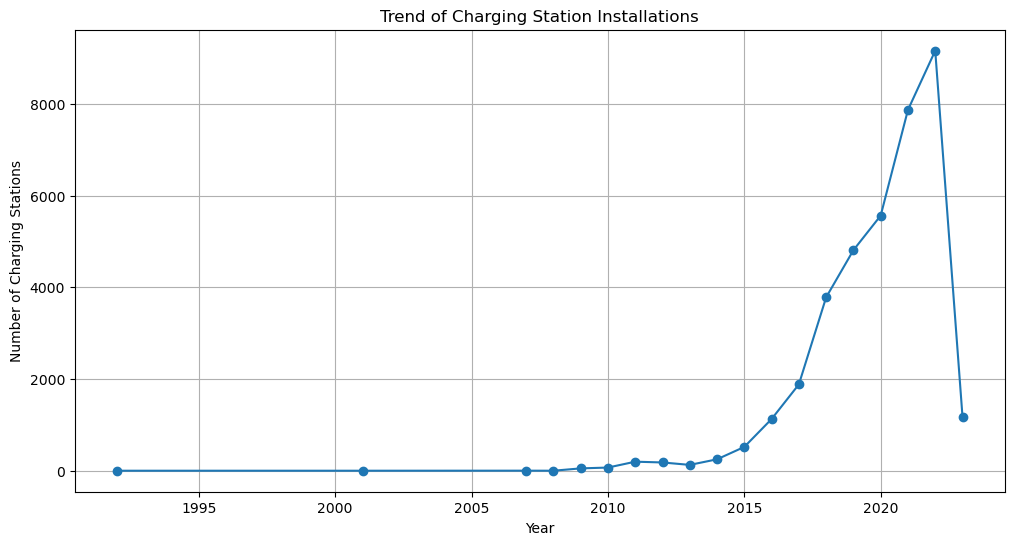

In [32]:
# Convert the 'commissioning_date' column to datetime data type
data['commissioning_date'] = pd.to_datetime(data['commissioning_date'])

# Group the data by year and count the number of charging stations commissioned each year
charging_stations_by_year = data['commissioning_date'].dt.year.value_counts().sort_index()

# Plot the trend of charging station installations over time
plt.figure(figsize=(12, 6))
charging_stations_by_year.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Charging Stations')
plt.title('Trend of Charging Station Installations')
plt.grid(True)
plt.show()



In [33]:
# Age of charging stations: Calculate the age in years
current_date = pd.to_datetime('today').normalize()
data['age'] = (current_date - data['commissioning_date']).dt.days / 365

# Regional variations: Distribution of commissioning dates by city
commissioning_dates_by_city = data.groupby('city')['commissioning_date'].agg(['min', 'max'])
commissioning_dates_by_city['year_diff'] = commissioning_dates_by_city['max'].dt.year - commissioning_dates_by_city['min'].dt.year
commissioning_dates_by_city

,min,max,year_diff
city,,,
Aach,2019-11-04,2021-02-10,2
Aachen,2010-07-03,2023-01-25,13
Aachen-Brand,2019-03-28,2019-03-28,0
Aachen-Königshügel,2021-01-26,2021-01-26,0
Aalen,2014-10-01,2022-11-08,8
...,...,...,...
Übach-Palenberg,2014-06-06,2021-08-16,7
Überherrn,2020-10-19,2022-01-01,2
Überlingen,2012-11-26,2021-06-25,9


> Based on the Analysis Germany have enough number of infrastructure to efficiently charge the growing number of electronic cars